# <span style="background-color: #25424C"> Deep Learning Model Building</span>

I am using DenseNet121 as it is a well-known model that is shown to be effective in image classification. It is also relatively smaller in size compared to VGG which helps to reduce the load on my computer and it also increases the efficiency of the model and reducing the possibility of the model to be overfitted. To tailor DenseNet to my needs, I am using transfer learning where my base model is DenseNet121 which has been trained on ImageNet dataset. Then I am freezing the layers to that they are not trained during the fie tuning process. Afterwards, I am adding my own classification layers on top of the pre-trained model and train these new layers with our dataset.

We are using the Adam optimizer with a learning rate of 0.0001 because Adam is commonly use in deep learning. It is similar to gradient descent that we have learn during class. It uses a moving average of the gradient and adjust the learning rate of each weight parameter.

Early Stopping is implemented so that time can be save when there is very little improvement made to the model with each epoch

### **DenseNet121 Model**

In [ ]:
# DenseNet121 Model

optimizer = Adam(learning_rate=1e-4)
lrs = tf.keras.callbacks.ReduceLROnPlateau()
loss = tf.keras.losses.CategoricalCrossentropy()
int_lr = 0.0001
epoch = 30
batch_size = 32

# Early Stopping helps to stop the training process when the model stops improving. This is to reduce the amount of time needed to train over nuance changes in the model. 
early_stoppage = EarlyStopping(monitor='val_loss', patience=10)

# DenseNet Model
densed_Model = DenseNet121(include_top=False,input_tensor= tf.keras.Input(shape=(256,256,3)), weights='imagenet')


# Freeze the layers
for layer in densed_Model.layers[:101]:    
    layer.trainable = False

for layer in densed_Model.layers[101:]:  
    layer.trainable = True


tfDense_model = tf.keras.Sequential()
tfDense_model.add(densed_Model)
tfDense_model.add(Flatten())
tfDense_model.add(BatchNormalization())
tfDense_model.add(Dense(256, activation='relu'))
tfDense_model.add(Dropout(0.3))
tfDense_model.add(BatchNormalization())
tfDense_model.add(Dense(128, activation='relu'))
tfDense_model.add(Dropout(0.3))
tfDense_model.add(BatchNormalization())
tfDense_model.add(Dense(64, activation='relu'))
tfDense_model.add(Dropout(0.3))
tfDense_model.add(BatchNormalization())
tfDense_model.add(Dense(32, activation='relu'))
tfDense_model.add(Dropout(0.3))
tfDense_model.add(Dense(2, activation='softmax'))


tfDense_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model
tfDense_model.fit(train_datagen, epochs=epoch, validation_data=val_datagen, callbacks=[early_stoppage,lrs])

tfDense_model.summary()

tfDense_model.save('./model/denseNet121/denseNetModel.h5')
tfDense_model.save_weights('./model/denseNet121/denseNetWeights.h5')


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-28 12:27:14.702585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-28 12:27:14.702998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2023-03-28 12:27:17.783710: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-28 12:27:22.247763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


60/60 [==============================] - ETA: 0s - loss: 0.3950 - accuracy: 0.8325

2023-03-28 12:27:58.994329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


60/60 [==============================] - 48s 632ms/step - loss: 0.3950 - accuracy: 0.8325 - val_loss: 0.3925 - val_accuracy: 0.8325 - lr: 1.0000e-04
Epoch 2/30
60/60 [==============================] - 30s 490ms/step - loss: 0.2565 - accuracy: 0.9047 - val_loss: 0.1948 - val_accuracy: 0.9479 - lr: 1.0000e-04
Epoch 3/30
60/60 [==============================] - 29s 486ms/step - loss: 0.1931 - accuracy: 0.9400 - val_loss: 0.1688 - val_accuracy: 0.9447 - lr: 1.0000e-04
Epoch 4/30
60/60 [==============================] - 30s 500ms/step - loss: 0.1474 - accuracy: 0.9610 - val_loss: 0.1310 - val_accuracy: 0.9558 - lr: 1.0000e-04
Epoch 5/30
60/60 [==============================] - 29s 483ms/step - loss: 0.1196 - accuracy: 0.9652 - val_loss: 0.2858 - val_accuracy: 0.8768 - lr: 1.0000e-04
Epoch 6/30
60/60 [==============================] - 29s 483ms/step - loss: 0.1154 - accuracy: 0.9695 - val_loss: 0.2172 - val_accuracy: 0.9336 - lr: 1.0000e-04
Epoch 7/30
60/60 [==============================] -

In [ ]:
tfDense_model.history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

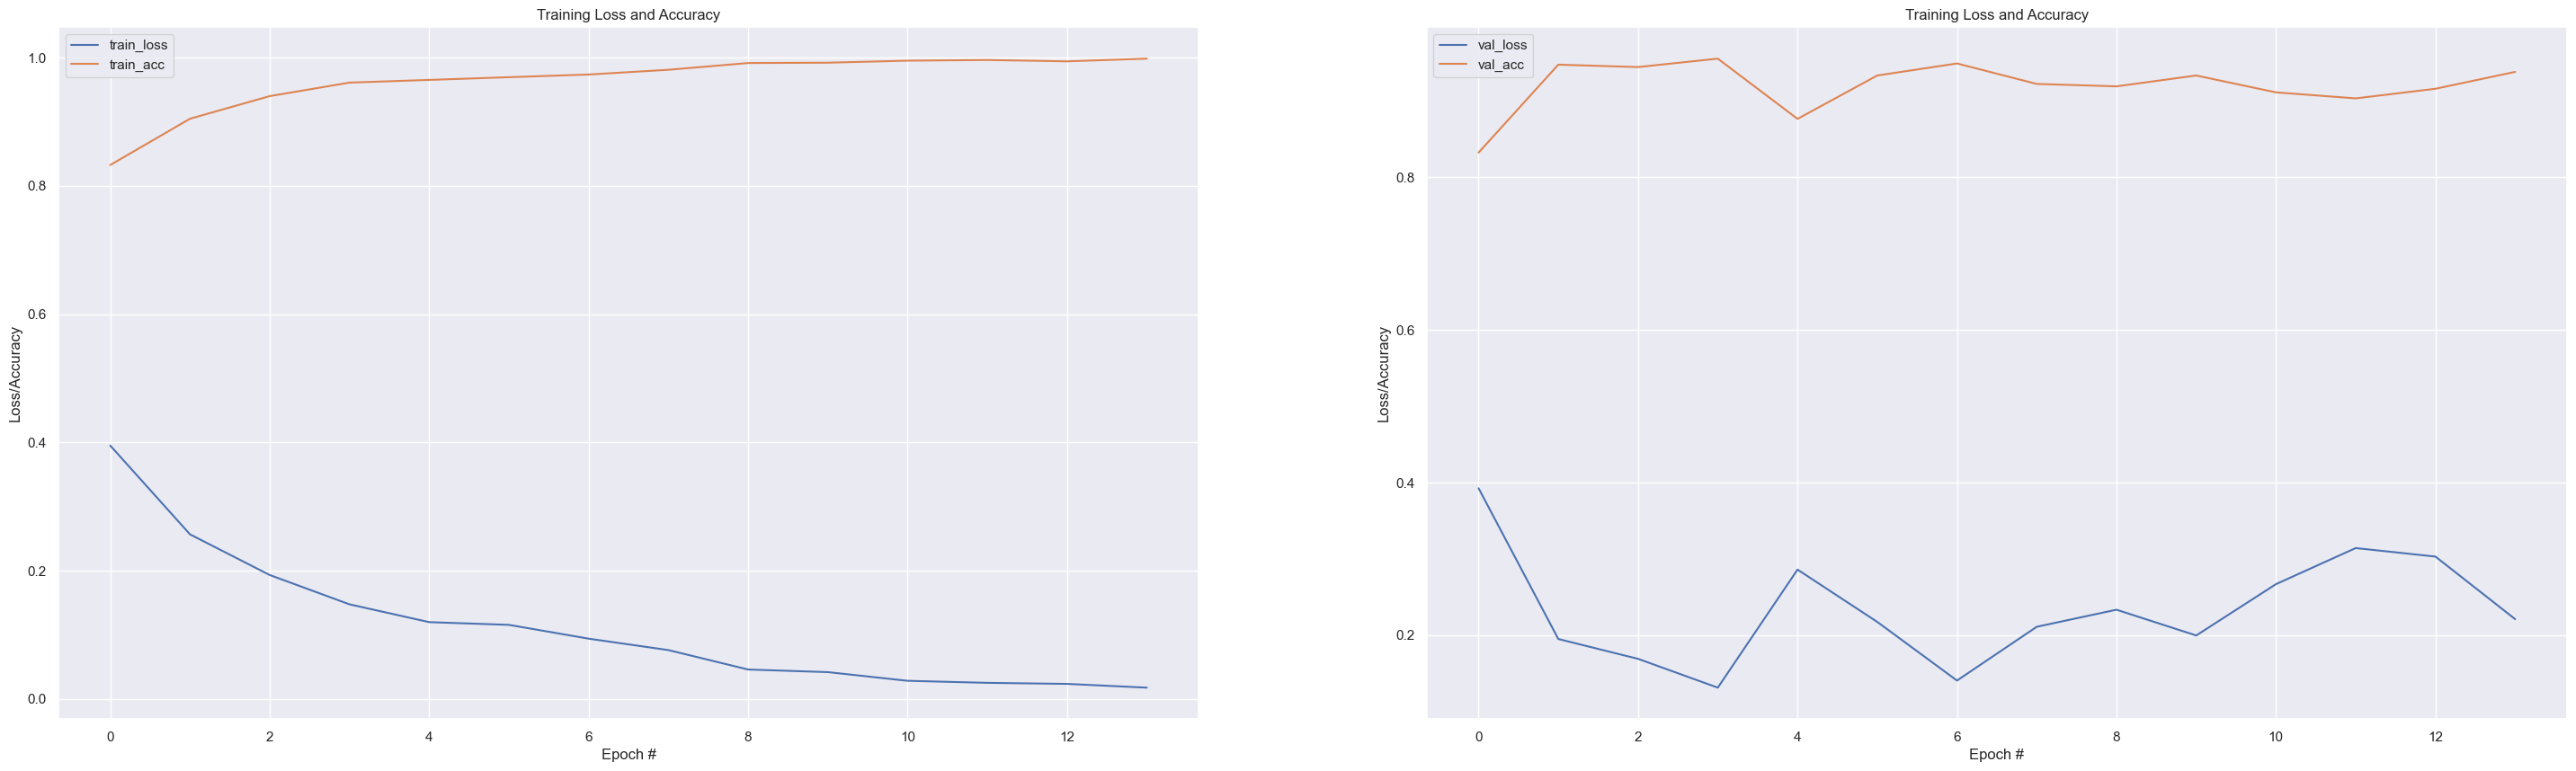

In [ ]:
# Plotting the loss and accuracy
iteration = np.arange(0, 14)

plt.figure(figsize=(36, 10))
ax = plt.subplot(1, 2, 1)

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.plot(iteration, tfDense_model.history.history["loss"], label="train_loss")
plt.plot(iteration, tfDense_model.history.history["accuracy"], label="train_acc")
plt.legend()


ax = plt.subplot(1, 2, 2)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.plot(iteration, tfDense_model.history.history["val_loss"], label="val_loss")
plt.plot(iteration, tfDense_model.history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# load the model
model_load_dense = tf.keras.models.load_model('./model/denseNet121/denseNetModel.h5')
model_load_dense.load_weights('./model/denseNet121/denseNetWeights.h5')

# Evaluate the model
loss , accuracy = model_load_dense.evaluate(test_datagen)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

2023-03-28 12:35:22.186877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 10s 350ms/step - loss: 0.1514 - accuracy: 0.9653
Loss: 0.1514
Accuracy: 0.9653


In [ ]:
print(_augment_confusion_matrix(model_load_dense, test_datagen)[1])

2023-03-28 12:35:38.891006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      NORMAL       0.50      0.48      0.49       317
   PNEUMONIA       0.50      0.52      0.51       317

    accuracy                           0.50       634
   macro avg       0.50      0.50      0.50       634
weighted avg       0.50      0.50      0.50       634



Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Even though our accuracy is high, our precision and recall are low. This means that our model is not able to predict the positive class well. I will be comparing our model with the augmented version

(0.0, 2.0, 2.0, 0.0)

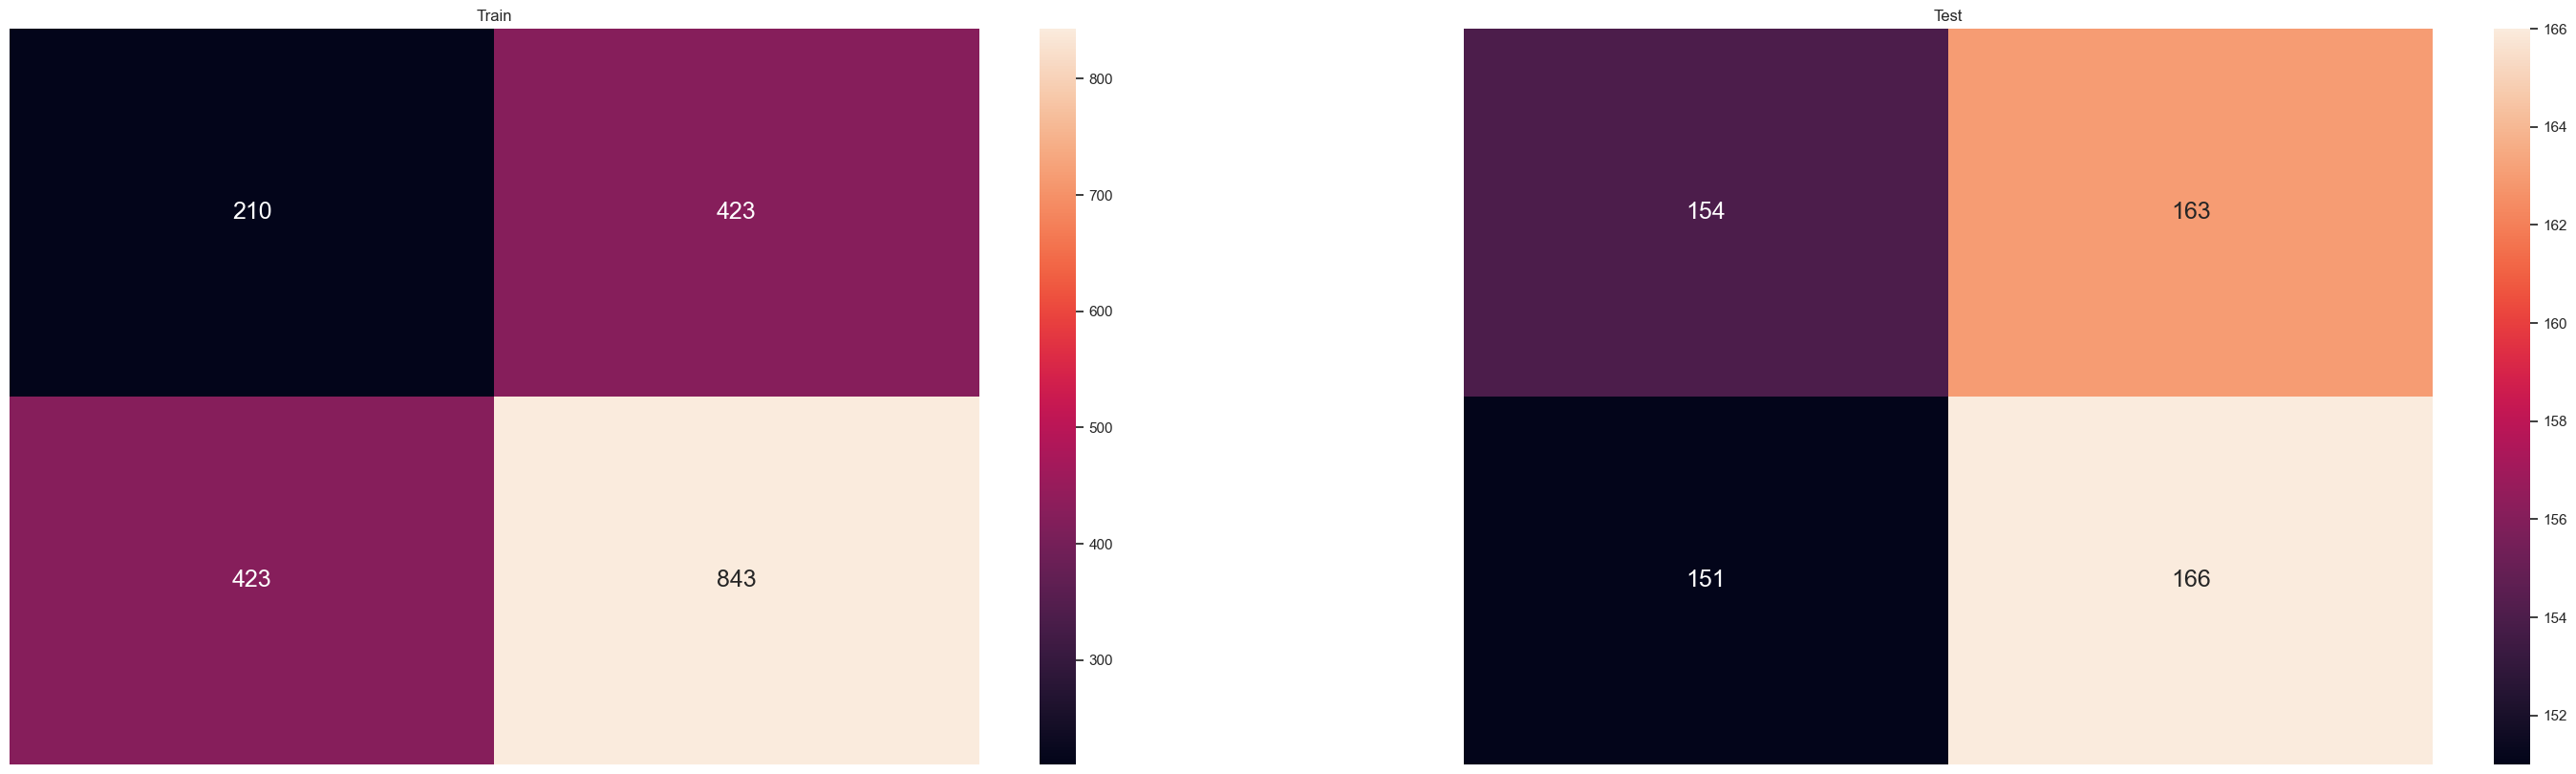

In [ ]:
# Confusion matrix

plt.figure(figsize=(36, 10))
ax = plt.subplot(1, 2, 1)
plt.title("Train")
sb.heatmap(_augment_confusion_matrix(model_load_dense, train_datagen)[0], annot = True, fmt=".0f", annot_kws={"size": 18})
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.title("Test")
sb.heatmap(_augment_confusion_matrix(model_load_dense, test_datagen)[0], annot = True, fmt=".0f", annot_kws={"size": 18})
plt.axis("off")

2023-03-28 13:07:50.000243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(-0.5, 255.5, 255.5, -0.5)

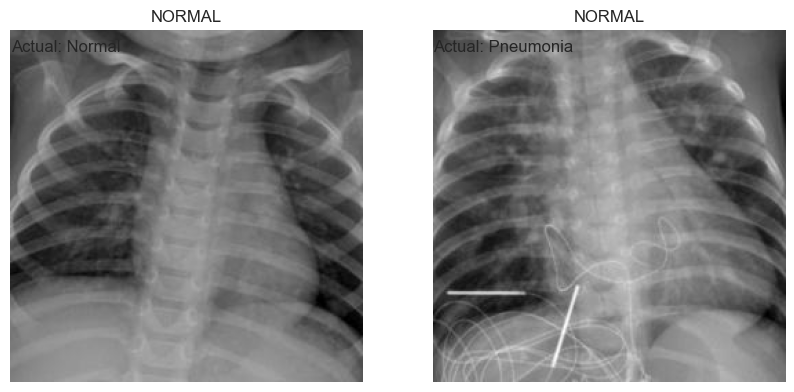

In [ ]:
image = tf.keras.utils.load_img('./crop_images/test/NORMAL/' + random.choice(os.listdir('./crop_images/test/NORMAL/')), target_size=(256, 256))

# load the model
model_load = tf.keras.models.load_model('./model/denseNet121/denseNetModel.h5')
model_load.load_weights('./model/denseNet121/denseNetWeights.h5')

preds = np.argmax(model_load.predict_generator(np.expand_dims(image, axis=0), verbose=0), axis=-1) #model_load.predict(np.expand_dims(image, axis=0))

class_dictionary = test_datagen.class_indices
class_dictionary = { value:key for key,value in class_dictionary.items()}
class_list = [value for _,value in class_dictionary.items()]

image_batch = test_datagen.next()

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(class_list[preds.argmax()])
plt.text(0,15,"Actual: Normal")
plt.axis("off")

image = tf.keras.utils.load_img('./crop_images/test/PNEUMONIA/' + random.choice(os.listdir('./crop_images/test/PNEUMONIA/')), target_size=(256, 256))
preds = np.argmax(model_load.predict_generator(np.expand_dims(image, axis=0), verbose=0), axis=-1) #model_load.predict(np.expand_dims(image, axis=0))

ax = plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title(class_list[preds.argmax()])
plt.text(0,15,"Actual: Pneumonia")
plt.axis("off")

We can see that the image has been wrongly classified which is dangerous. It is because people will not get the right treatment and probably treat it as a normal cold. However, if our model were to only wrongly classify Normal as Penumonia, it is safer as the patient still can get a check.

### **ResNet50 Model**


I am using ResNet as my base model to see the difference as ResNet are suited for more complex tasks which I hope it can spot the subtle differences betweent the two classes for a higher accuracy

In [ ]:
# ResNet50 Model

optimizer = Adam(learning_rate=1e-4)
lrs = tf.keras.callbacks.ReduceLROnPlateau()
loss = tf.keras.losses.CategoricalCrossentropy()
int_lr = 0.0001
epoch = 30
batch_size = 32

# Early Stopping helps to stop the training process when the model stops improving. This is to reduce the amount of time needed to train over nuance changes in the model. 
early_stoppage = EarlyStopping(monitor='val_loss', patience=10)

# DenseNet Model
res_Model = ResNet50(include_top=False,input_tensor= tf.keras.Input(shape=(256,256,3)), weights='imagenet')


# Freeze the layers
for layer in res_Model.layers[:101]:    
    layer.trainable = False

for layer in res_Model.layers[101:]:  
    layer.trainable = True


tfRes_model = tf.keras.Sequential()
tfRes_model.add(res_Model)
tfRes_model.add(Flatten())
tfRes_model.add(BatchNormalization())
tfRes_model.add(Dense(256, activation='relu'))
tfRes_model.add(Dropout(0.3))
tfRes_model.add(BatchNormalization())
tfRes_model.add(Dense(128, activation='relu'))
tfRes_model.add(Dropout(0.3))
tfRes_model.add(BatchNormalization())
tfRes_model.add(Dense(64, activation='relu'))
tfRes_model.add(Dropout(0.3))
tfRes_model.add(BatchNormalization())
tfRes_model.add(Dense(32, activation='relu'))
tfRes_model.add(Dropout(0.3))
tfRes_model.add(Dense(2, activation='softmax'))


tfRes_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model
tfRes_model.fit(train_datagen, epochs=epoch, validation_data=val_datagen, callbacks=[early_stoppage,lrs])

tfRes_model.summary()

tfRes_model.save('./model/resNet50/resNet50Model.h5')
tfRes_model.save_weights('./model/resNet50/resNet50Weights.h5')



Epoch 1/30


2023-03-28 13:08:14.532583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


60/60 [==============================] - ETA: 0s - loss: 0.4934 - accuracy: 0.7773

2023-03-28 13:08:48.137132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


60/60 [==============================] - 43s 601ms/step - loss: 0.4934 - accuracy: 0.7773 - val_loss: 0.5330 - val_accuracy: 0.7615 - lr: 1.0000e-04
Epoch 2/30
60/60 [==============================] - 26s 426ms/step - loss: 0.2770 - accuracy: 0.8863 - val_loss: 0.2349 - val_accuracy: 0.9668 - lr: 1.0000e-04
Epoch 3/30
60/60 [==============================] - 25s 421ms/step - loss: 0.2102 - accuracy: 0.9284 - val_loss: 0.2046 - val_accuracy: 0.9573 - lr: 1.0000e-04
Epoch 4/30
60/60 [==============================] - 25s 418ms/step - loss: 0.1599 - accuracy: 0.9521 - val_loss: 0.1499 - val_accuracy: 0.9637 - lr: 1.0000e-04
Epoch 5/30
60/60 [==============================] - 25s 420ms/step - loss: 0.1167 - accuracy: 0.9674 - val_loss: 0.1120 - val_accuracy: 0.9747 - lr: 1.0000e-04
Epoch 6/30
60/60 [==============================] - 24s 408ms/step - loss: 0.0957 - accuracy: 0.9731 - val_loss: 0.1577 - val_accuracy: 0.9542 - lr: 1.0000e-04
Epoch 7/30
60/60 [==============================] -

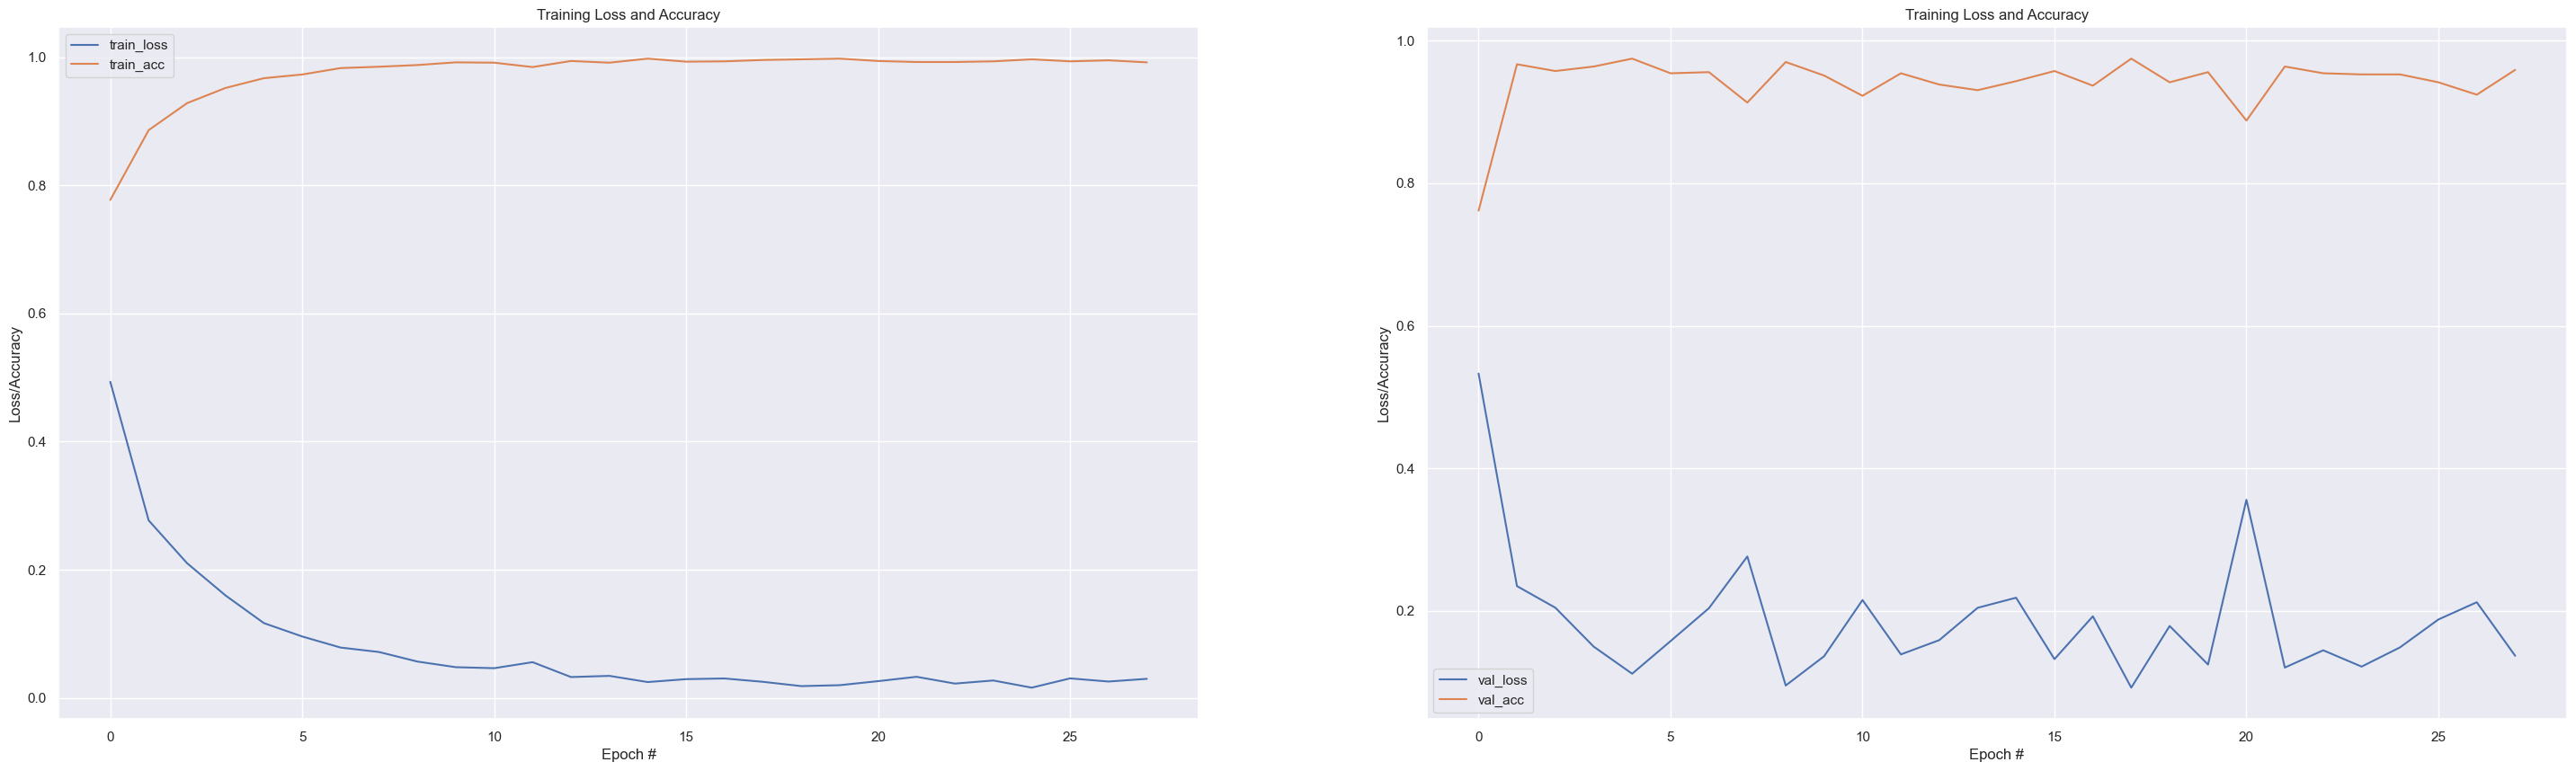

In [ ]:
# Plotting the loss and accuracy
iteration = np.arange(0, 28)

plt.figure(figsize=(36, 10))
ax = plt.subplot(1, 2, 1)

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.plot(iteration, tfRes_model.history.history["loss"], label="train_loss")
plt.plot(iteration, tfRes_model.history.history["accuracy"], label="train_acc")
plt.legend()


ax = plt.subplot(1, 2, 2)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.plot(iteration, tfRes_model.history.history["val_loss"], label="val_loss")
plt.plot(iteration, tfRes_model.history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# load the model
model_load_res = tf.keras.models.load_model('./model/resNet50/resNet50Model.h5')
model_load_res.load_weights('./model/resNet50/resNet50Weights.h5')

# Evaluate the model
loss , accuracy = model_load_res.evaluate(test_datagen)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

print(_augment_confusion_matrix(model_load_res, test_datagen)[1])


2023-03-28 13:20:25.161439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 9s 311ms/step - loss: 0.1283 - accuracy: 0.9590
Loss: 0.1283
Accuracy: 0.9590


2023-03-28 13:20:34.282730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

      NORMAL       0.50      0.49      0.50       317
   PNEUMONIA       0.50      0.51      0.51       317

    accuracy                           0.50       634
   macro avg       0.50      0.50      0.50       634
weighted avg       0.50      0.50      0.50       634



(0.0, 2.0, 2.0, 0.0)

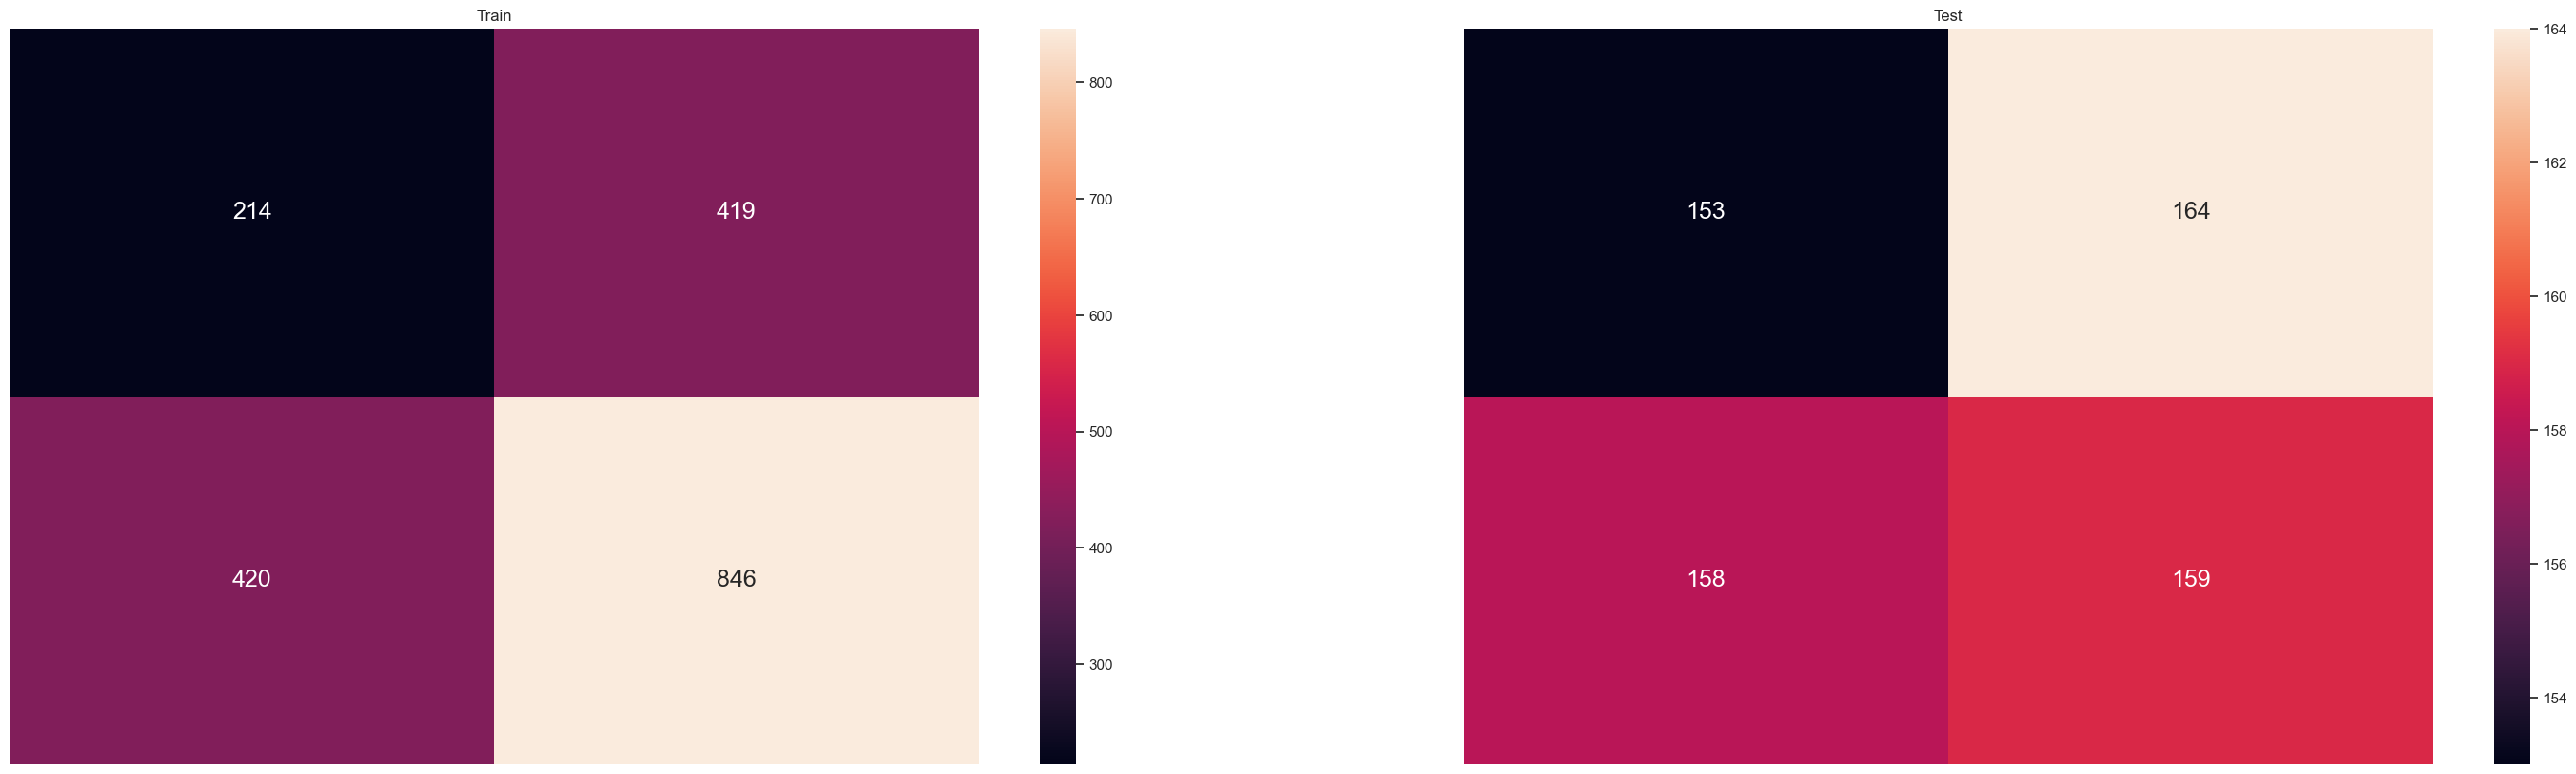

In [ ]:
# Confusion matrix

plt.figure(figsize=(36, 10))
ax = plt.subplot(1, 2, 1)
plt.title("Train")
sb.heatmap(_augment_confusion_matrix(model_load_res, train_datagen)[0], annot = True, fmt=".0f", annot_kws={"size": 18})
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.title("Test")
sb.heatmap(_augment_confusion_matrix(model_load_res, test_datagen)[0], annot = True, fmt=".0f", annot_kws={"size": 18})
plt.axis("off")

2023-03-28 13:25:16.041793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(-0.5, 255.5, 255.5, -0.5)

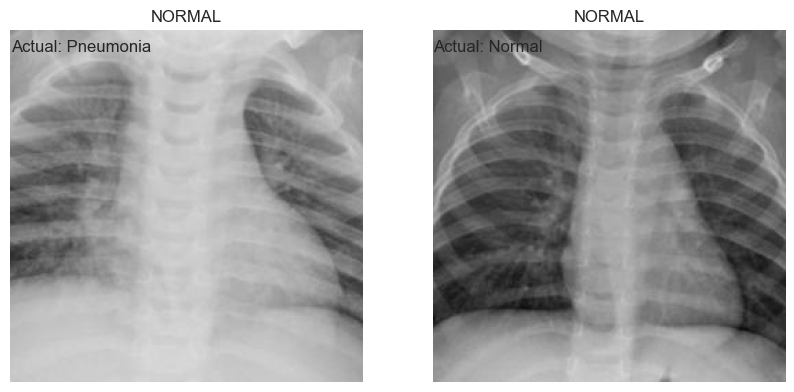

In [ ]:
# load the model
model_load = tf.keras.models.load_model('./model/resNet50/resNet50Model.h5')
model_load.load_weights('./model/resNet50/resNet50Weights.h5')

image = tf.keras.utils.load_img('./crop_images/test/NORMAL/' + random.choice(os.listdir('./crop_images/test/NORMAL/')), target_size=(256, 256))
preds = np.argmax(model_load.predict_generator(np.expand_dims(image, axis=0), verbose=0), axis=-1) 

image_pn = tf.keras.utils.load_img('./crop_images/test/PNEUMONIA/' + random.choice(os.listdir('./crop_images/test/PNEUMONIA/')), target_size=(256, 256))
pred_pn = np.argmax(model_load.predict_generator(np.expand_dims(image_pn, axis=0), verbose=0), axis=-1) 


class_dictionary = test_datagen.class_indices
class_dictionary = { value:key for key,value in class_dictionary.items()}
class_list = [value for _,value in class_dictionary.items()]

image_batch = test_datagen.next()

plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
plt.imshow(image_pn)
plt.title(class_list[pred_pn.argmax()])
plt.text(0,15,"Actual: Pneumonia")
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title(class_list[preds.argmax()])
plt.text(0,15,"Actual: Normal")
plt.axis("off")